In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import random
import h5py
import math
import matplotlib.pyplot as plt
import jax
import jax.numpy as np
import fk

## General simulations setup
This guarantees to have the same shape and samedx and dt

In [3]:
# simulation inputs (real values)
root = "/media/ep119/DATADRIVE3/epignatelli/deepexcite/"
field_size = (12, 12)  # cm
d = 0.001  # (cm^2/ms)
cell_parameters = fk.params.params3()

# infinitesimals
dx = 0.01  # (cm/units) - Fenton 1998 recommends ~200, 300 micron/gridunit (~0.02, 0.03), smaller dx means finer grid
dt = 0.01  # (ms) - Fenton 1998 recommends few hundreds of ms (~0.01, 0.04)

# diffusivity 
d = 0.001  # cm^2/ms
shape = fk.convert.realsize_to_shape(field_size, dx)
diffusivity = np.ones(shape) * d

## Two linear waves

In [4]:
name = root + "train_dev_set/spiral_params5.hdf5"

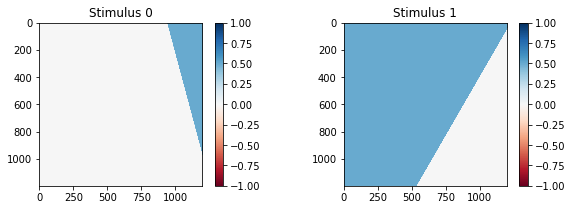

In [16]:
# times
start = 0  # ms
stop = 2000  # ms

# stimuli
s1 = fk.stimulus.protocol(start=0, duration=2)
s1 = fk.stimulus.triangular(shape, direction="right", angle=15, coverage=0.1, modulus=0.5, protocol=s1)

s2 = fk.stimulus.protocol(start=fk.convert.ms_to_units(400, dt), duration=2)
s2 = fk.stimulus.triangular(shape, direction="up", angle=60, coverage=0.7, modulus=0.5, protocol=s2)

# s3 = fk.stimulus.protocol(start=fk.convert.ms_to_units(900, dt), duration=2)
# s3 = fk.stimulus.triangular(shape, direction="down", angle=30, coverage=0.7, modulus=1., protocol=s3)

stimuli = [s1, s2]
fk.plot.show_stimuli(*stimuli)

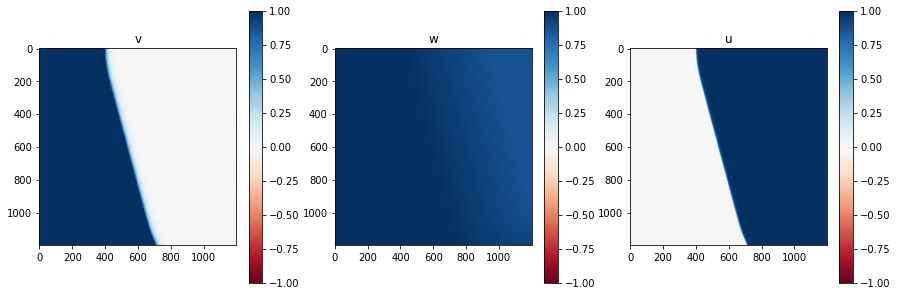

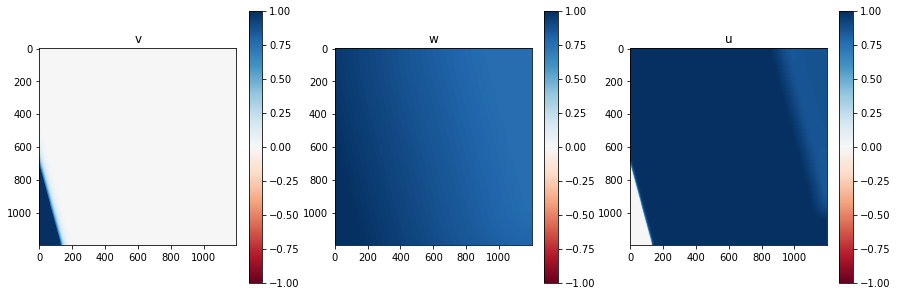

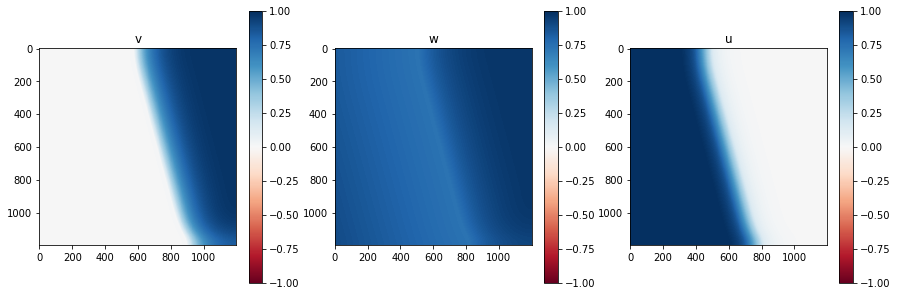

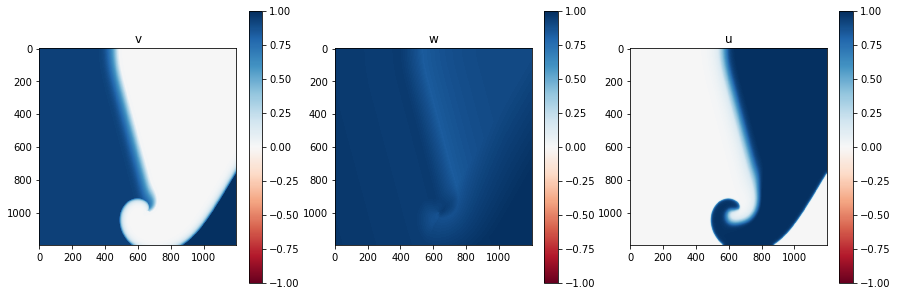

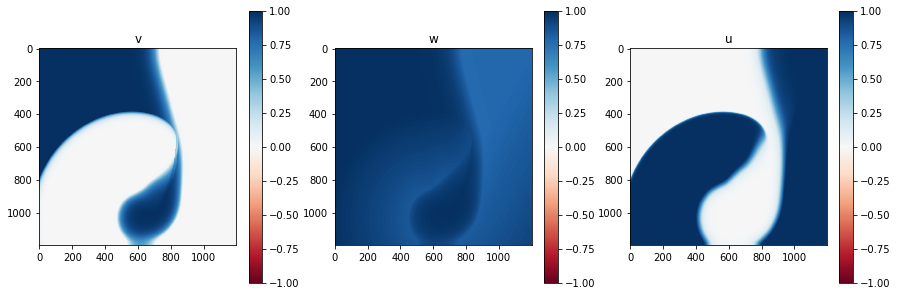

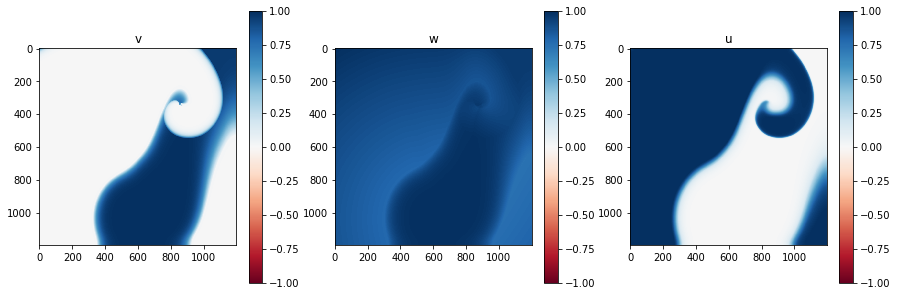

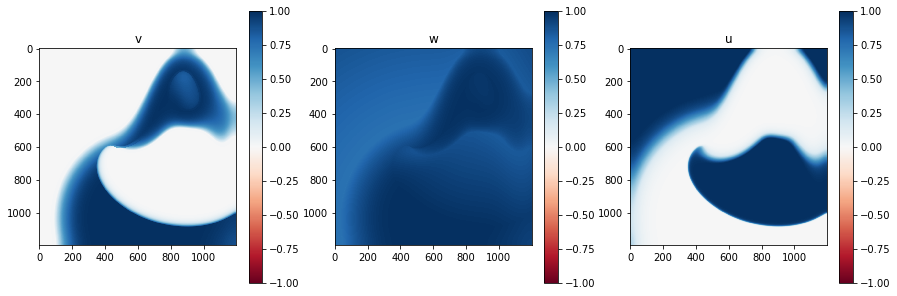

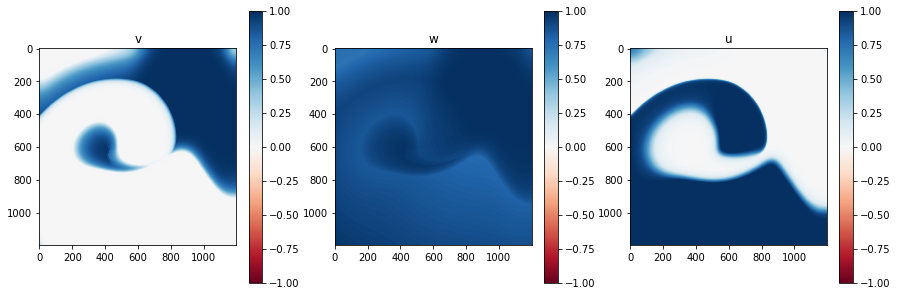

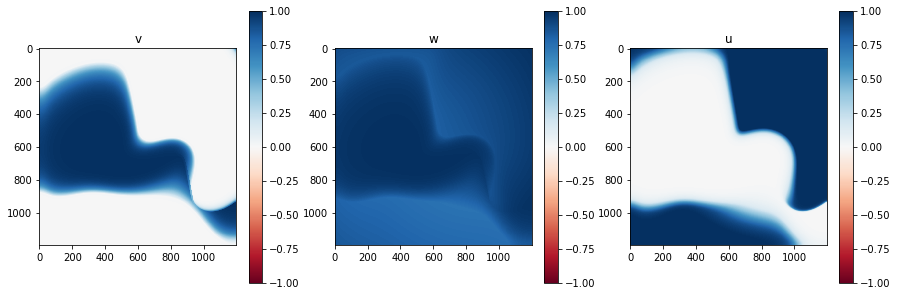

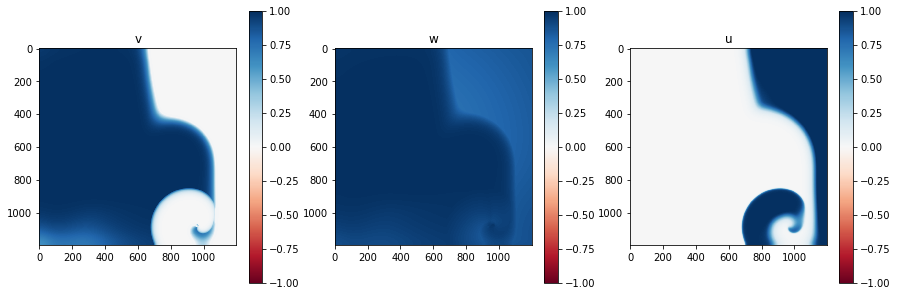

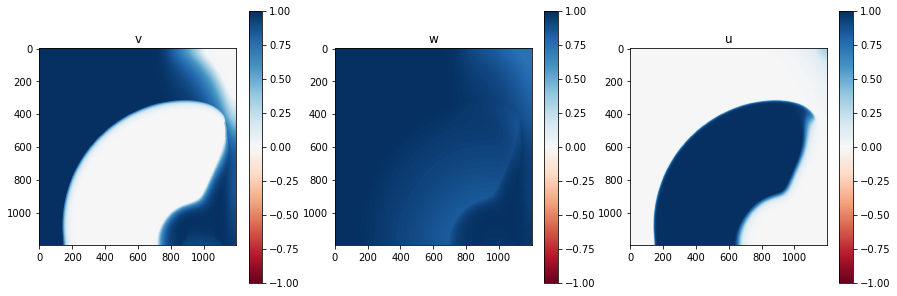

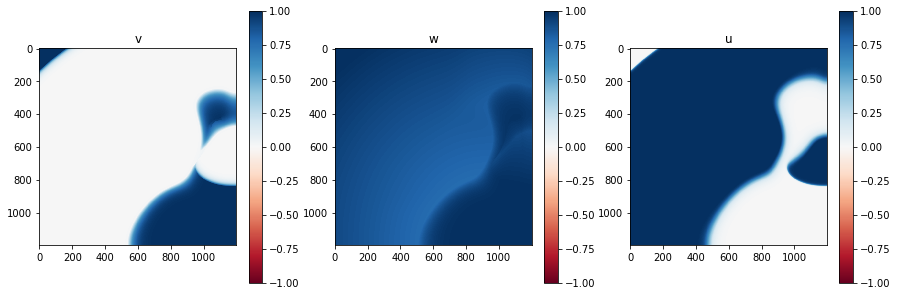

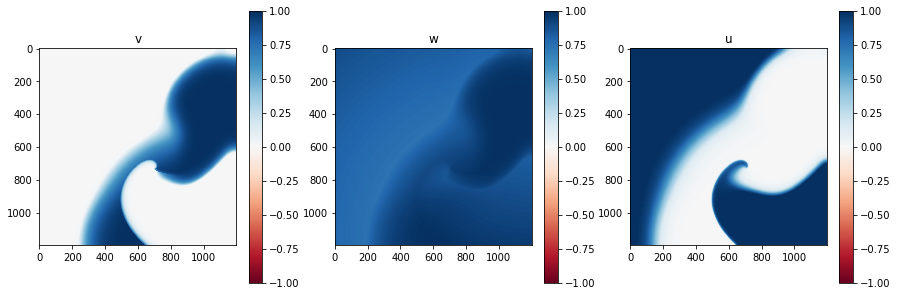

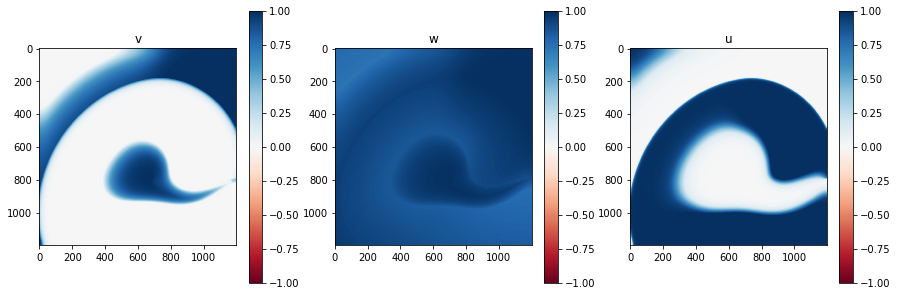

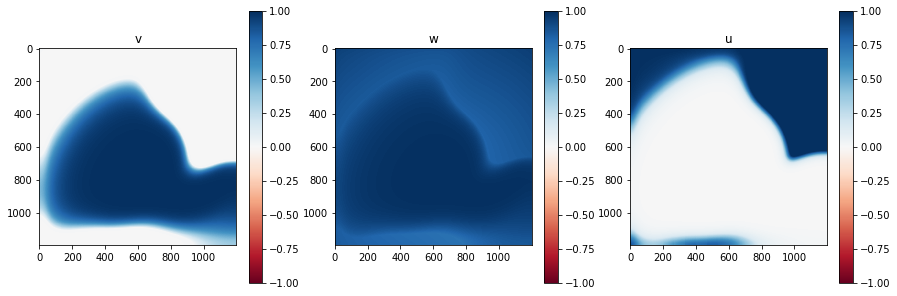

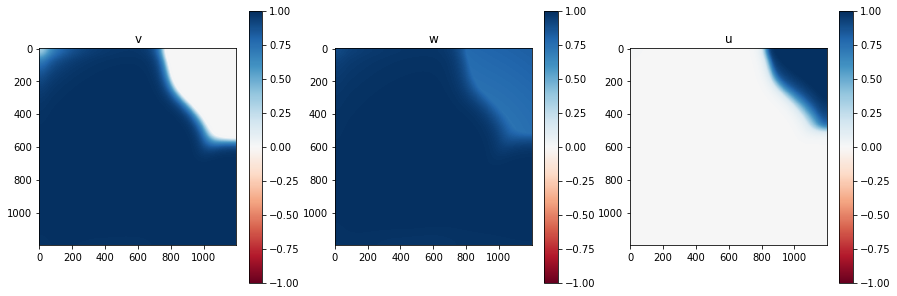

[DeviceArray([[-9.0014132e-34, -9.9861028e-34, -7.7774472e-34, ...,
                1.1911778e+00,  1.1911771e+00,  1.1911780e+00],
              [-9.0201081e-34, -1.0004798e-33, -7.7915411e-34, ...,
                1.1911775e+00,  1.1911761e+00,  1.1911770e+00],
              [-8.9632243e-34, -9.9407682e-34, -7.7430924e-34, ...,
                1.1911778e+00,  1.1911772e+00,  1.1911775e+00],
              ...,
              [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
                1.1536069e+00,  1.1536075e+00,  1.1536076e+00],
              [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
                1.1536069e+00,  1.1536086e+00,  1.1536080e+00],
              [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
                1.1536074e+00,  1.1536088e+00,  1.1536081e+00]],            dtype=float32),
 DeviceArray([[ 1.0682588e+00,  1.0682573e+00,  1.0682782e+00, ...,
                8.7131637e-01,  8.7131447e-01,  8.7131518e-01],
              [ 1.0682573e+00

In [37]:
checkpoints = np.arange(0, 200000, 12000)
states = fk.model.forward(shape, checkpoints, cell_parameters, diffusivity, stimuli, dt, dx)

Tissue size (12, 12) Grid size (1200, 1200)
Checkpointing at: [     0    100    200 ... 199700 199800 199900]
Cell parameters {'tau_v_plus': 3.33, 'tau_v1_minus': 19.6, 'tau_v2_minus': 1250, 'tau_w_plus': 870, 'tau_w_minus': 41, 'tau_d': 0.25, 'tau_0': 12.5, 'tau_r': 33.33, 'tau_si': 29, 'k': 10, 'V_csi': 0.85, 'V_c': 0.13, 'V_v': 0.04, 'Cm': 1}


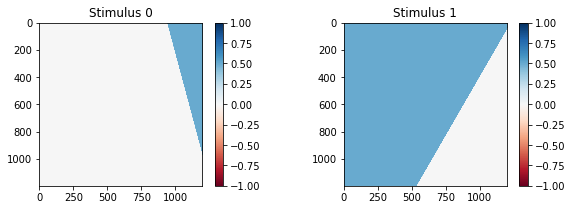

Solving at: 1999ms/1999ms		


In [38]:
fk.data.generate(start=fk.convert.ms_to_units(start, dt),
                 stop=fk.convert.ms_to_units(stop, dt),
                 dt=dt, dx=dx,
                 cell_parameters=cell_parameters,
                 diffusivity=diffusivity,
                 stimuli=stimuli,
                 filename=name)

(2000, 3, 1200, 1200)
(40, 3, 1200, 1200)


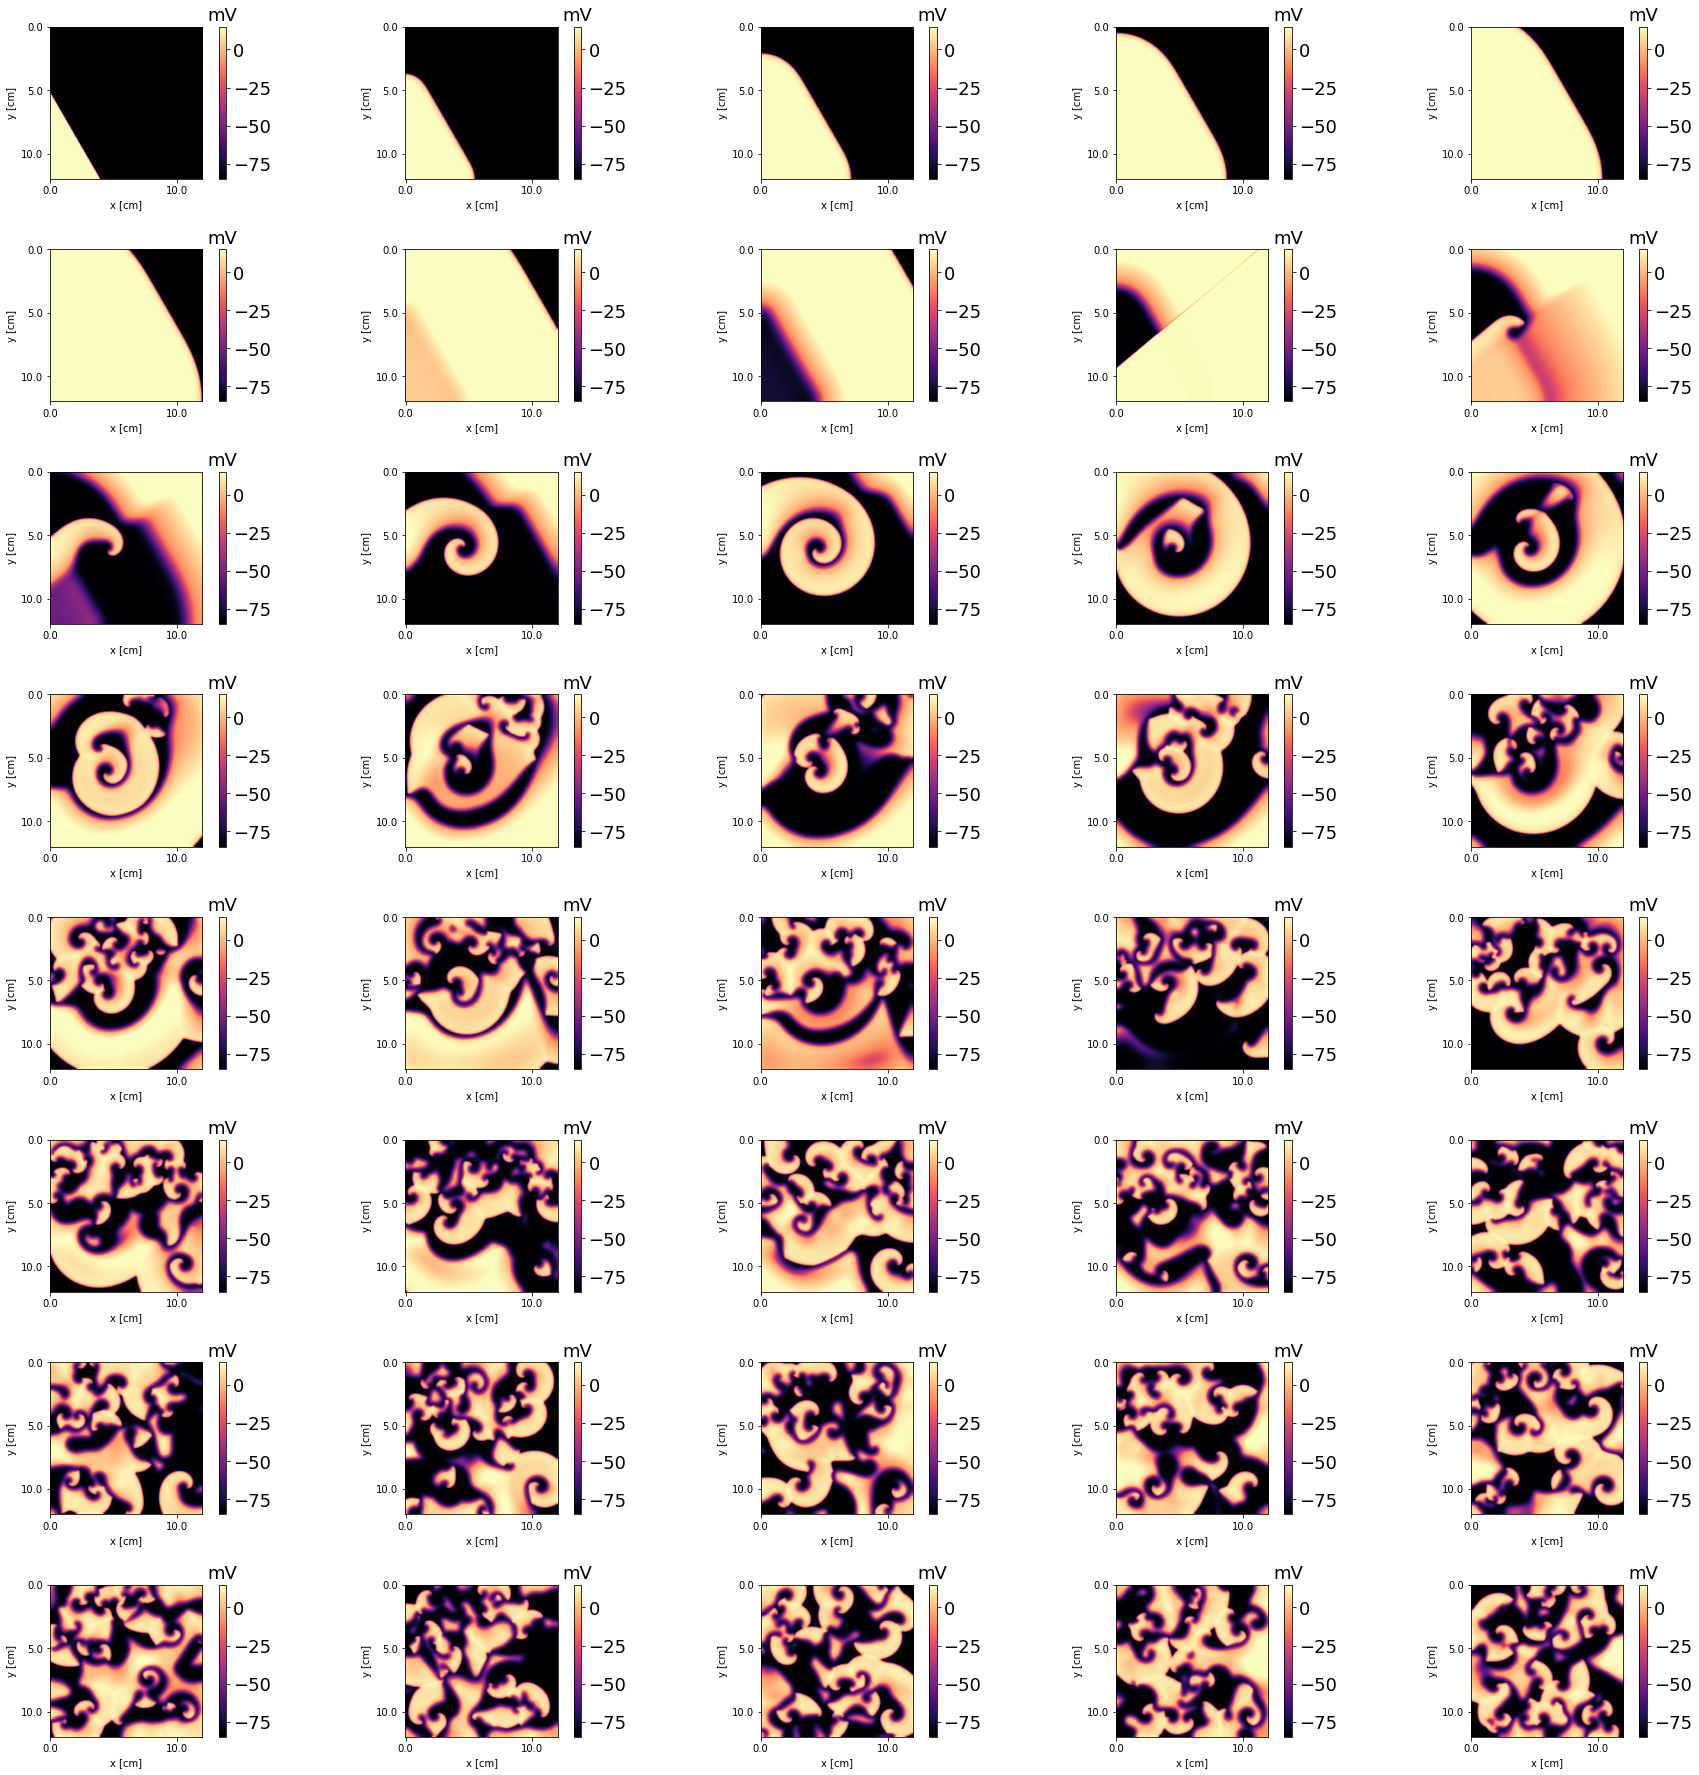

In [9]:
# display
show_every = 50  # ms
with h5py.File(name, "r") as file:
    states = file["states"][::show_every]
    print(file["states"].shape)
    print(states.shape)    

V = fk.convert.u_to_V(states[:, 2])
fig, ax = fk.plot.show_grid(V, figsize=(25, 25), font_size=18)

## Three tailored stimuli

In [19]:
name = root + "train_dev_set/three_points_params3.hdf5"

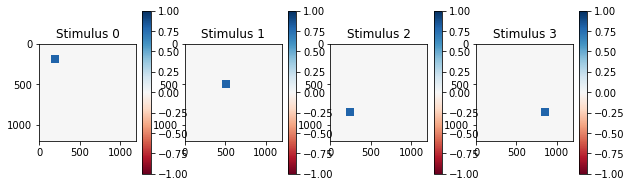

In [20]:
# times
start = 0  # ms
stop = 2000  # ms

# stimuli
centre = fk.convert.realsize_to_shape((2, 2), dx)
size = fk.convert.realsize_to_shape((1, 1), dx)
s1 = fk.stimulus.protocol(start=0, duration=2, period=0)
s1 = fk.stimulus.rectangular(shape, centre, size, .8, s1)

centre = fk.convert.realsize_to_shape((5, 5), dx)
size = fk.convert.realsize_to_shape((1, 1), dx)
s2 = fk.stimulus.protocol(start=fk.convert.ms_to_units(370, dt), duration=2, period=0)
s2 = fk.stimulus.rectangular(shape, centre, size, .8, s2)

centre = fk.convert.realsize_to_shape((8.5, 2.5), dx)
size = fk.convert.realsize_to_shape((1, 1), dx)
s3 = fk.stimulus.protocol(start=fk.convert.ms_to_units(600, dt), duration=2, period=0)
s3 = fk.stimulus.rectangular(shape, centre, size, .8, s3)

centre = fk.convert.realsize_to_shape((8.5, 8.5), dx)
size = fk.convert.realsize_to_shape((1, 1), dx)
s4 = fk.stimulus.protocol(start=fk.convert.ms_to_units(1500, dt), duration=2, period=0)
s4 = fk.stimulus.rectangular(shape, centre, size, .8, s4)

stimuli = [s1, s2, s3, s4]
fk.plot.show_stimuli(*stimuli)

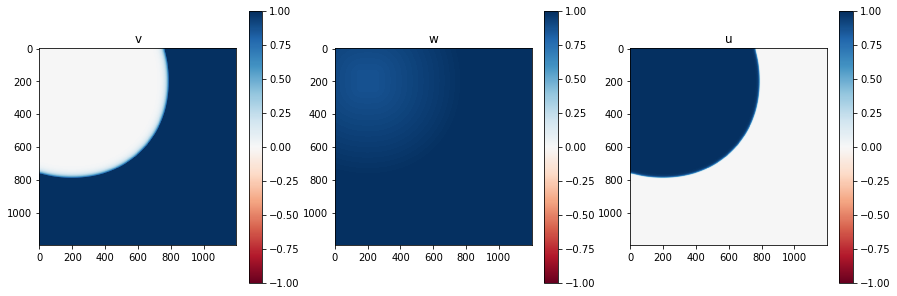

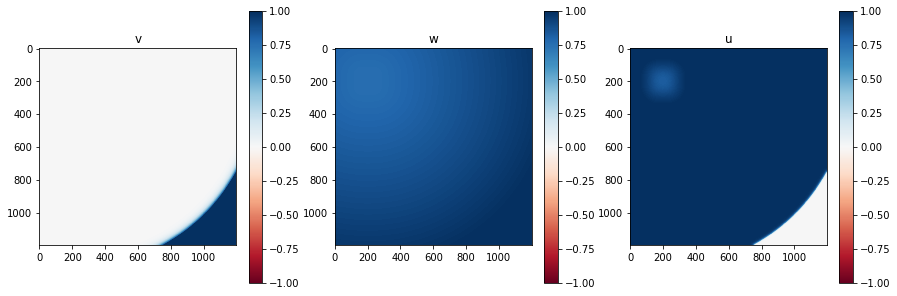

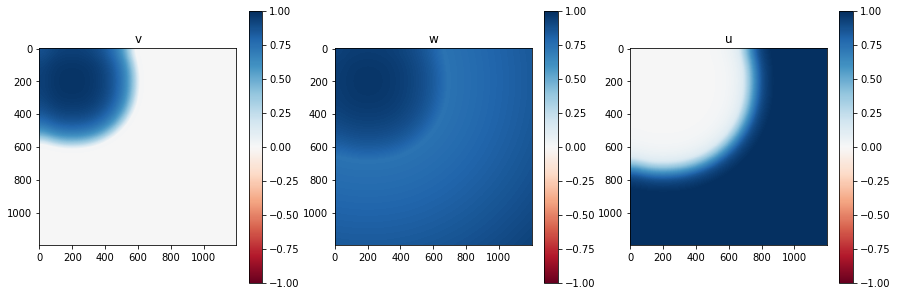

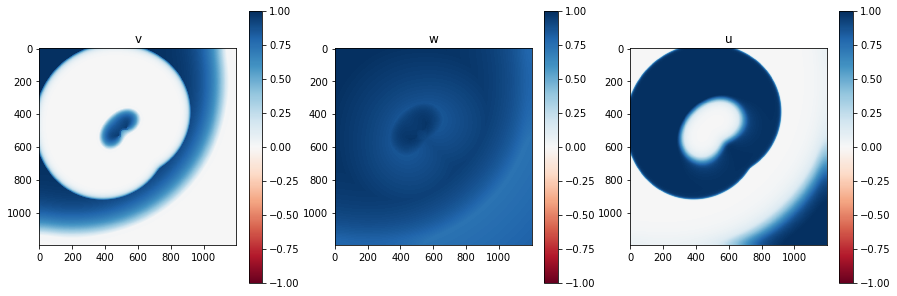

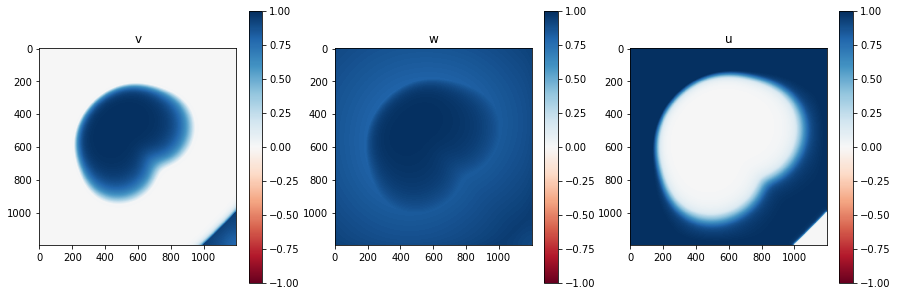

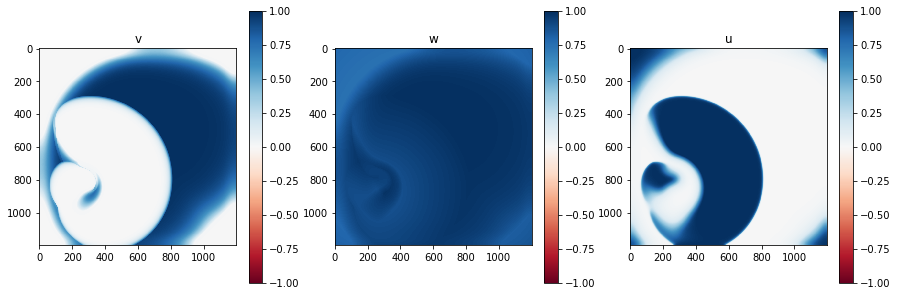

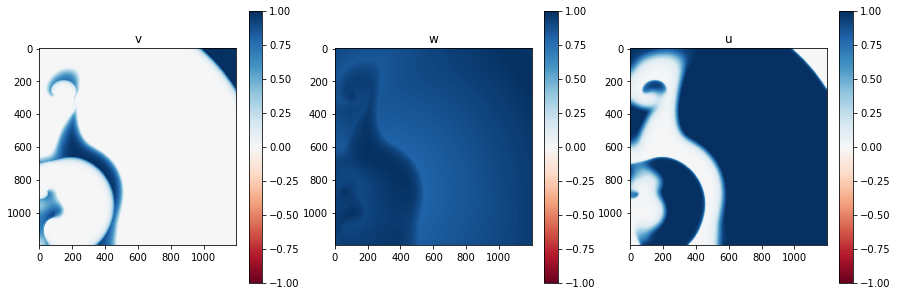

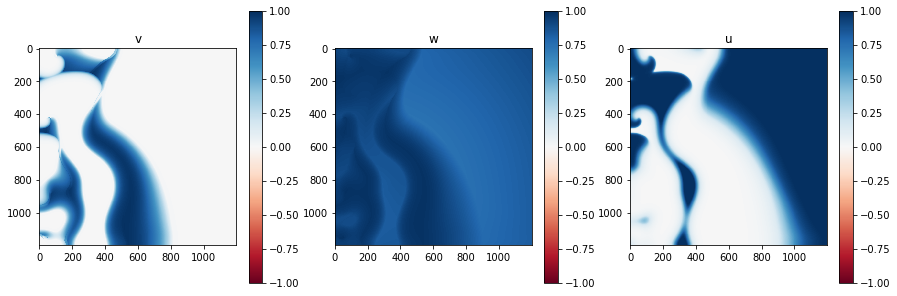

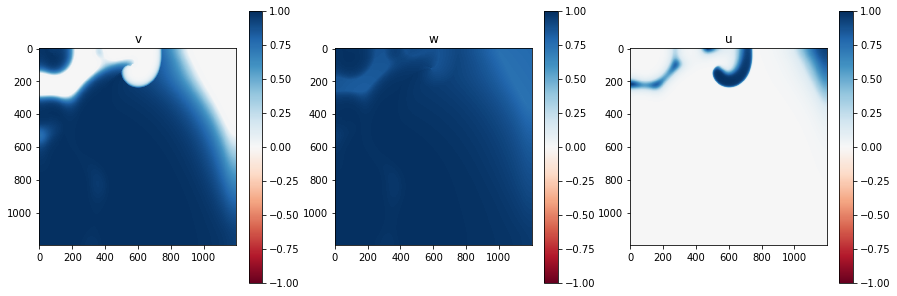

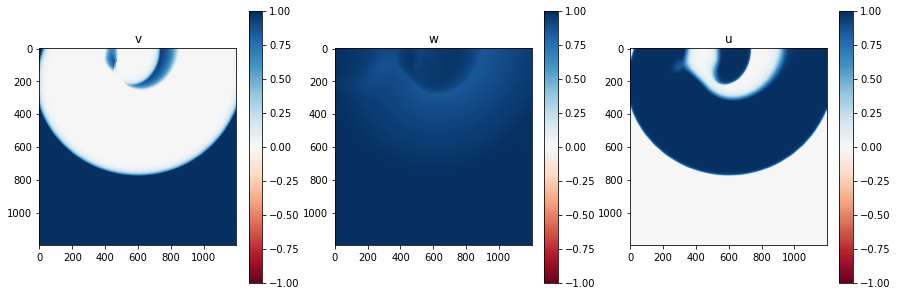

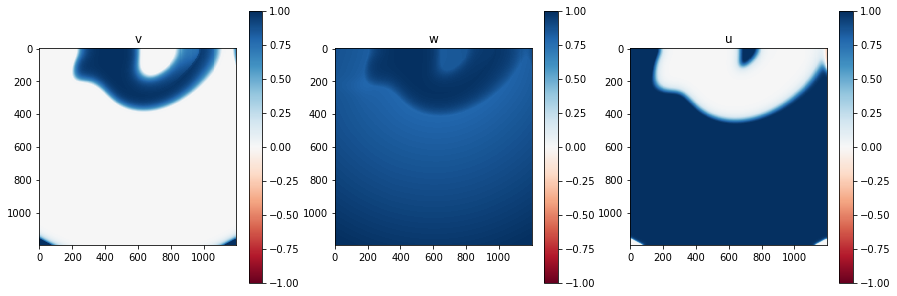

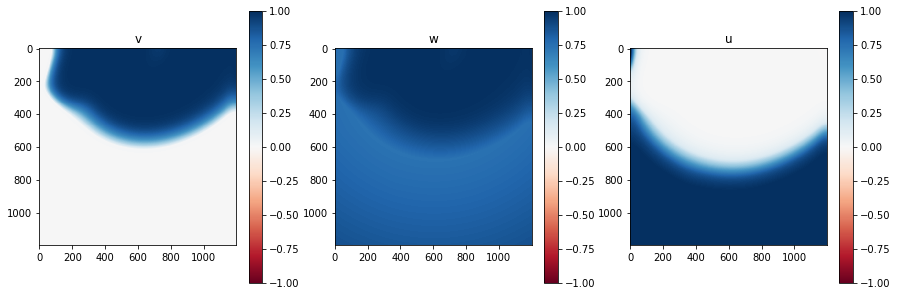

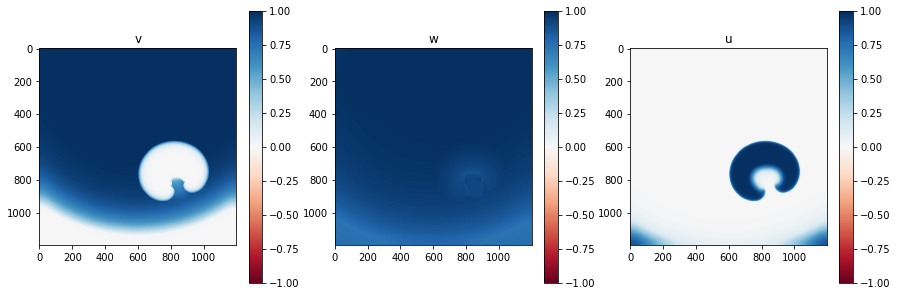

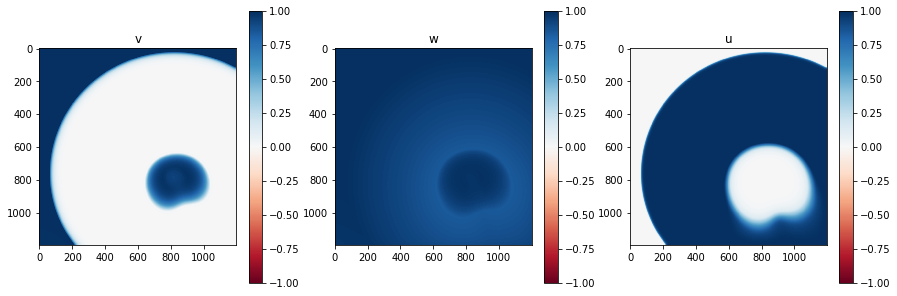

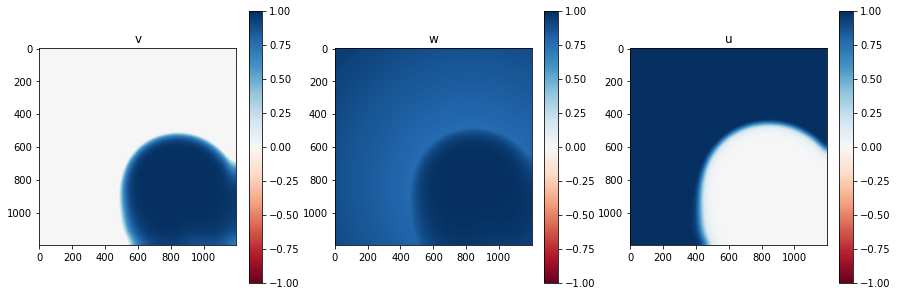

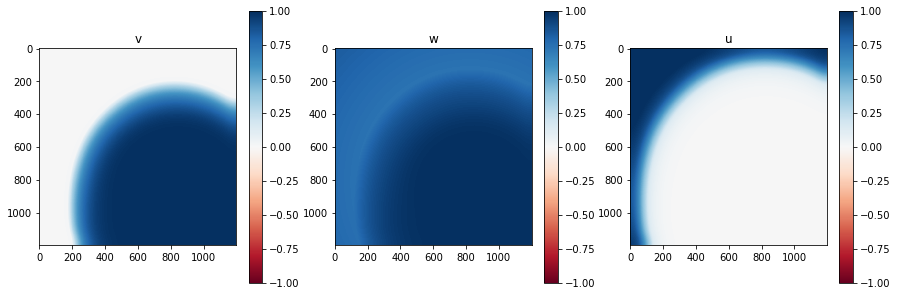

[DeviceArray([[1.1686139e+00, 1.1686122e+00, 1.1686128e+00, ...,
               7.1152636e-36, 9.0392222e-36, 8.1802454e-36],
              [1.1686122e+00, 1.1686105e+00, 1.1686119e+00, ...,
               7.1780812e-36, 9.1194226e-36, 8.2604458e-36],
              [1.1686128e+00, 1.1686119e+00, 1.1686119e+00, ...,
               6.9769263e-36, 8.8629210e-36, 8.0286372e-36],
              ...,
              [7.1152636e-36, 7.1780812e-36, 6.9769263e-36, ...,
               0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
              [9.0392222e-36, 9.1194226e-36, 8.8629210e-36, ...,
               0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
              [8.1802454e-36, 8.2604458e-36, 8.0286372e-36, ...,
               0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],            dtype=float32),
 DeviceArray([[1.0896062e+00, 1.0896068e+00, 1.0895869e+00, ...,
               1.0548749e+00, 1.0548551e+00, 1.0548543e+00],
              [1.0896068e+00, 1.0896072e+00, 1.0895873e+00, ...,
      

In [66]:
checkpoints = np.arange(0, 200000, 12000)
fk.model.forward(shape, checkpoints, cell_parameters, diffusivity, stimuli, dt, dx)

Tissue size (12, 12) Grid size (1200, 1200)
Checkpointing at: [     0    100    200 ... 199700 199800 199900]
Cell parameters {'tau_v_plus': 3.33, 'tau_v1_minus': 19.6, 'tau_v2_minus': 1250, 'tau_w_plus': 870, 'tau_w_minus': 41, 'tau_d': 0.25, 'tau_0': 12.5, 'tau_r': 33.33, 'tau_si': 29, 'k': 10, 'V_csi': 0.85, 'V_c': 0.13, 'V_v': 0.04, 'Cm': 1}


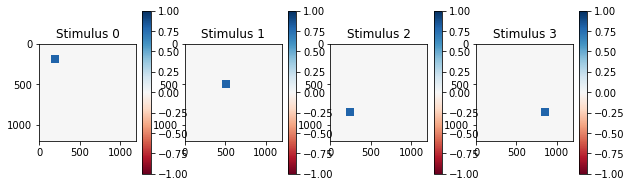

Solving at: 1999ms/1999ms		


In [67]:
fk.data.generate(start=fk.convert.ms_to_units(start, dt),
                 stop=fk.convert.ms_to_units(stop, dt),
                 dt=dt, dx=dx,
                 cell_parameters=cell_parameters,
                 diffusivity=diffusivity,
                 stimuli=stimuli,
                 filename=name)

(2000, 3, 1200, 1200)
(20, 3, 1200, 1200)


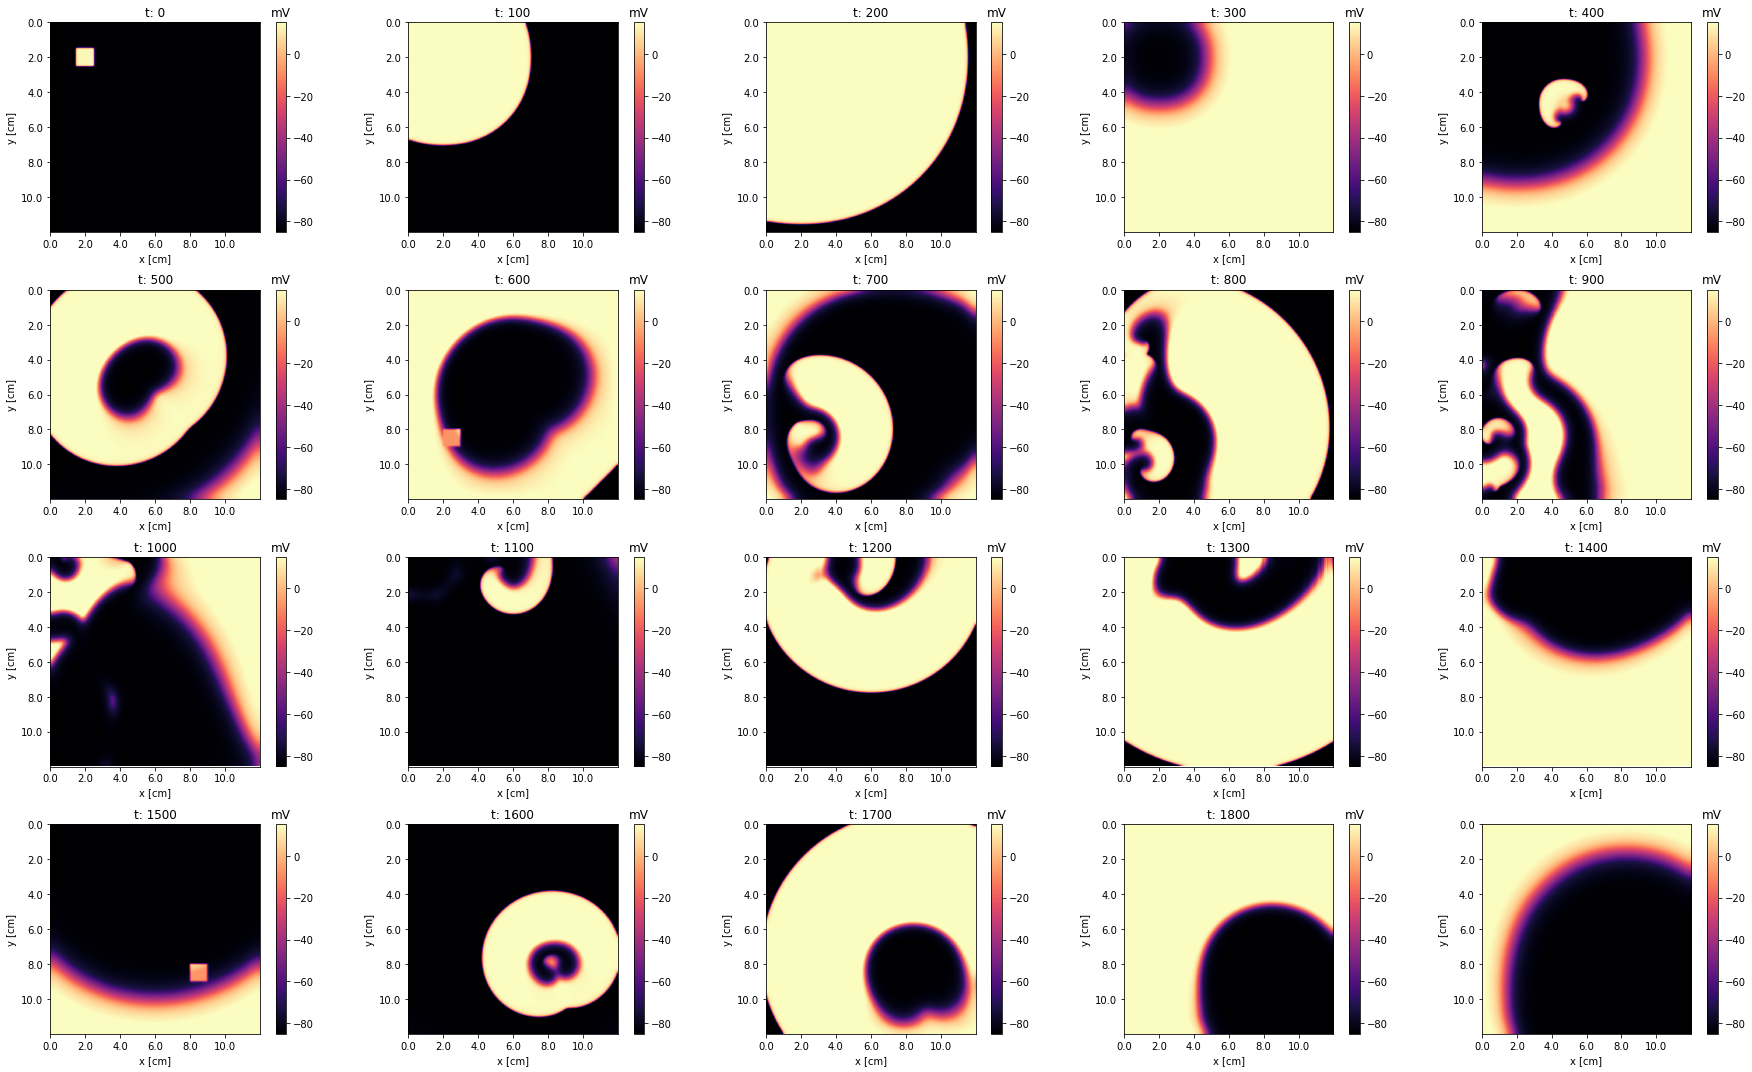

In [35]:
# display
show_every = 100  # ms
with h5py.File(name, "r") as file:
    states = file["states"][::show_every]
    print(file["states"].shape)
    print(states.shape)    

V = fk.convert.u_to_V(states[:, 2])
fig, ax = fk.plot.show_grid(V, figsize=(25, 15), times=range(0, len(V) * show_every, show_every))

## Heartbeat + external

In [7]:
name = root + "train_dev_set/heartbeat_params3.hdf5"

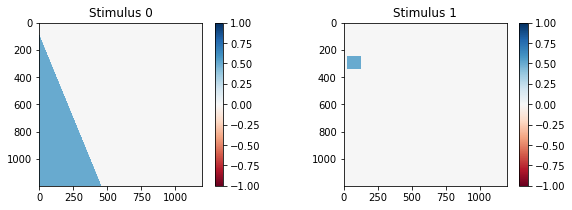

In [73]:
# times
start = 0  # ms
stop = 2000  # ms

# stimuli
import random
heartbeat = fk.stimulus.protocol(start=0, duration=2, period=fk.convert.ms_to_units(400, dt))
heartbeat = fk.stimulus.random_triangular(shape, 0.5, protocol=heartbeat)

external = fk.stimulus.protocol(start=fk.convert.ms_to_units(300, dt), duration=2,
                               period=fk.convert.ms_to_units(500, dt))
x1 = random.random() * (field_size[0] - 1)
x2 = random.random() * (field_size[1] - 1)
centre = fk.convert.realsize_to_shape((x1, x2), dx)
size = fk.convert.realsize_to_shape((1, 1), dx)
external = fk.stimulus.rectangular(shape, centre, size, 0.5, external)

stimuli = [heartbeat, external]
fk.plot.show_stimuli(*stimuli)

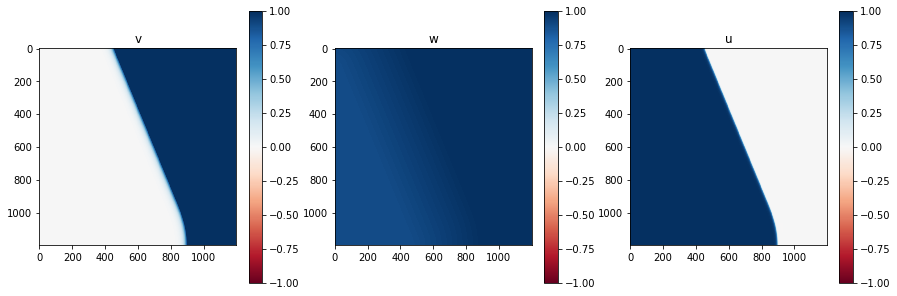

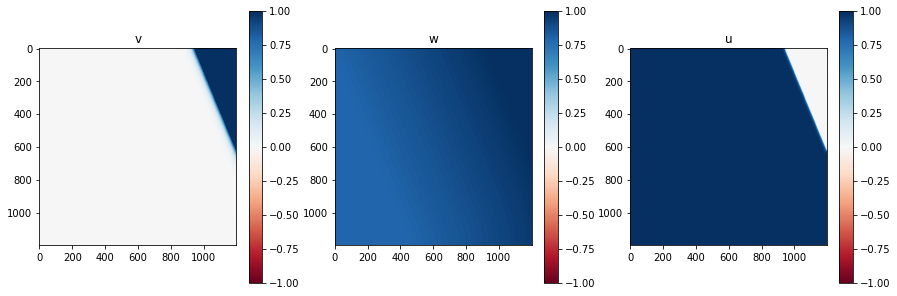

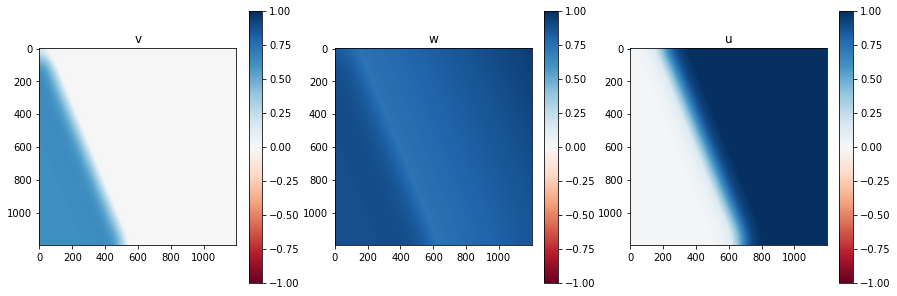

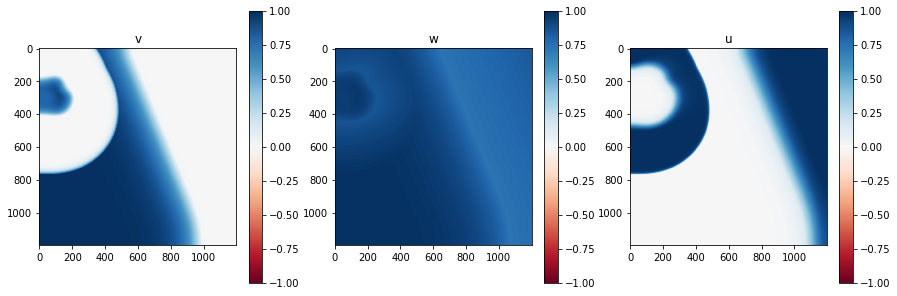

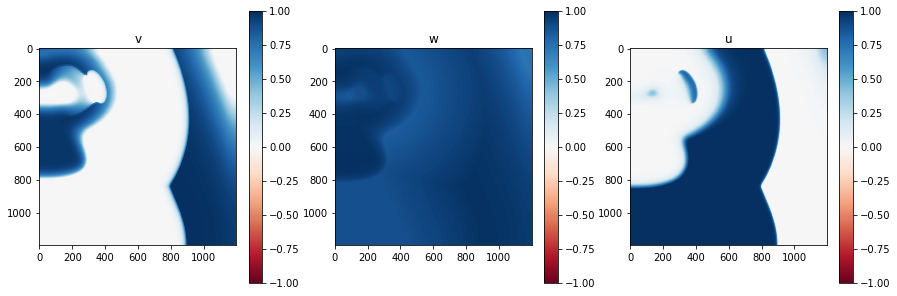

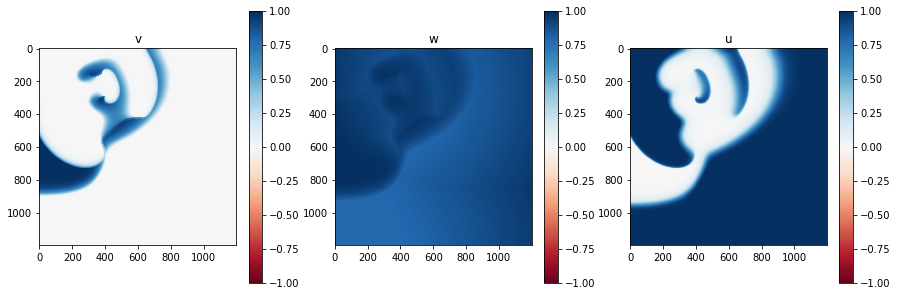

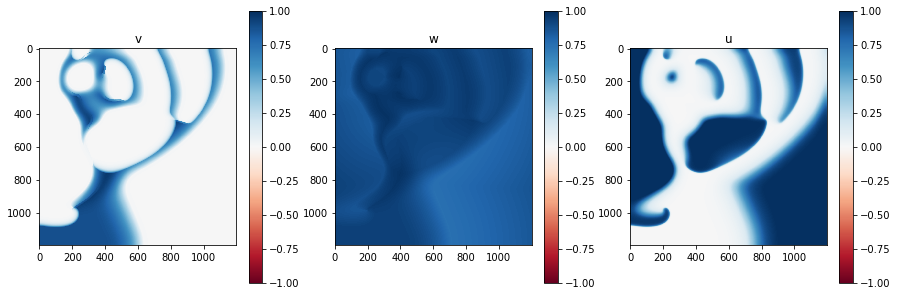

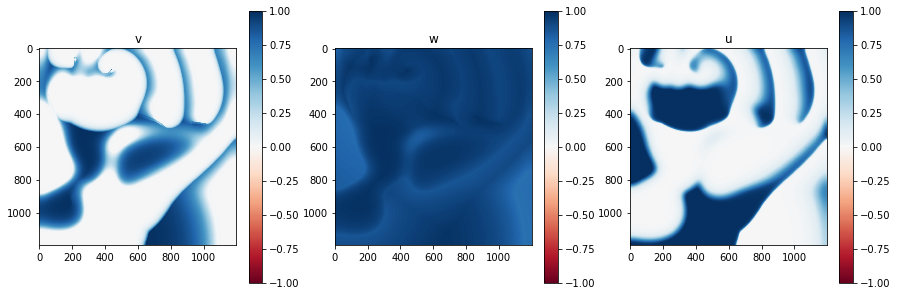

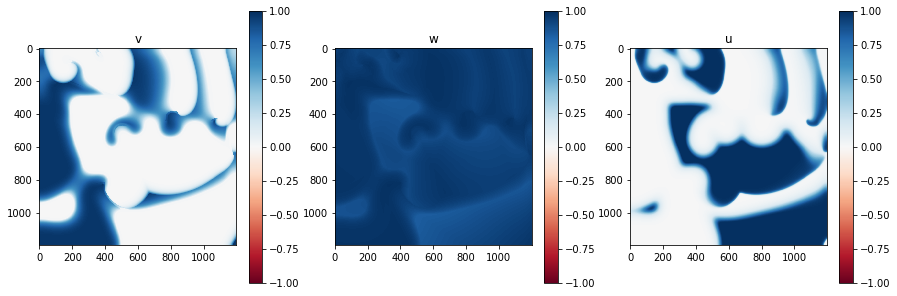

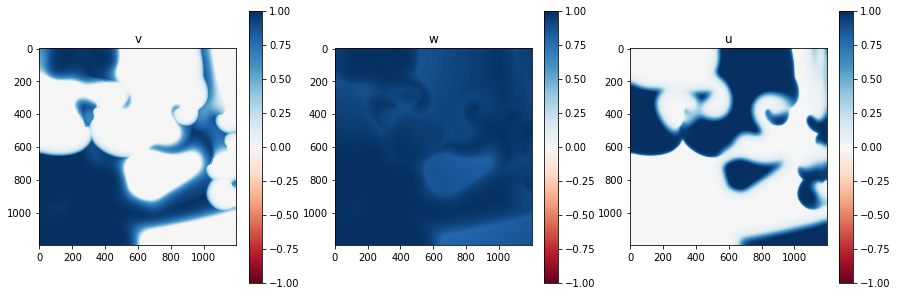

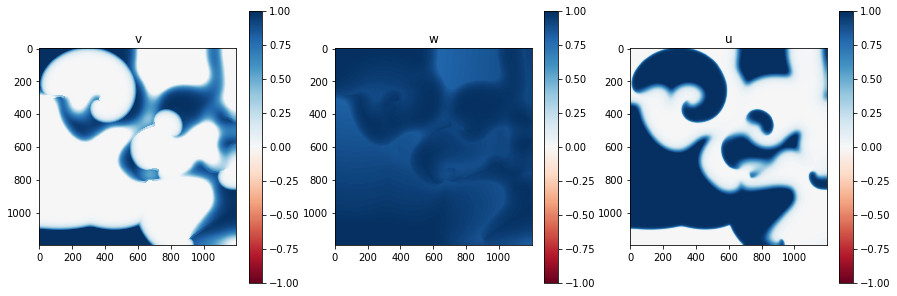

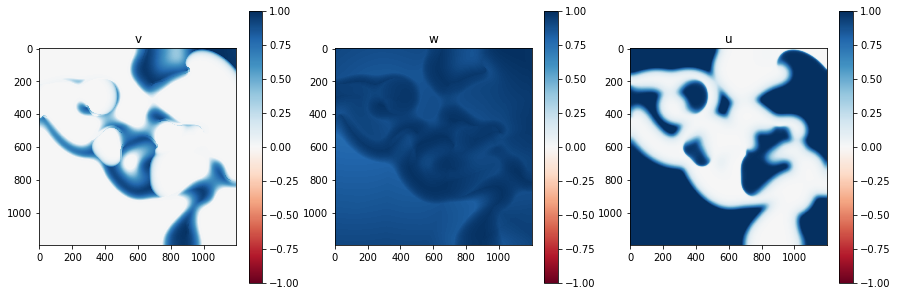

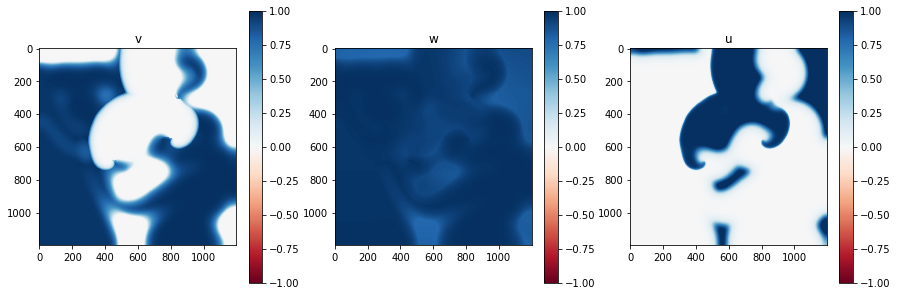

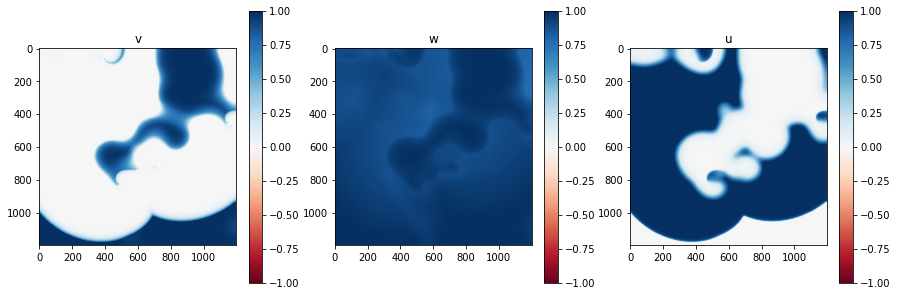

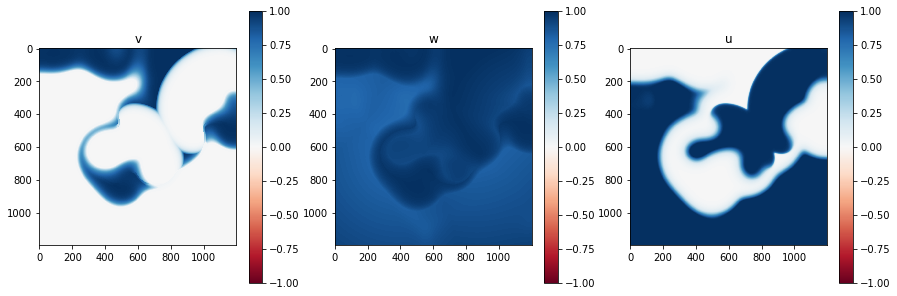

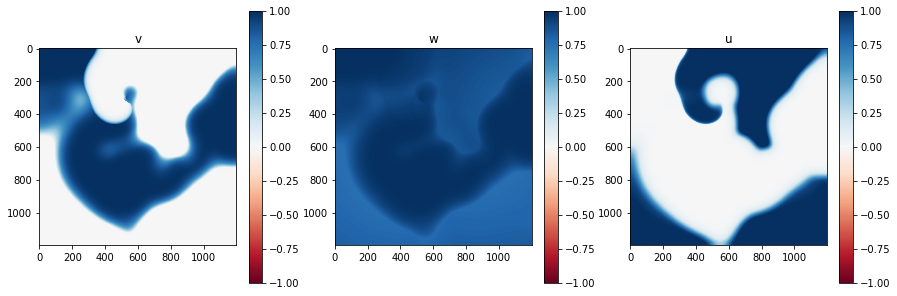

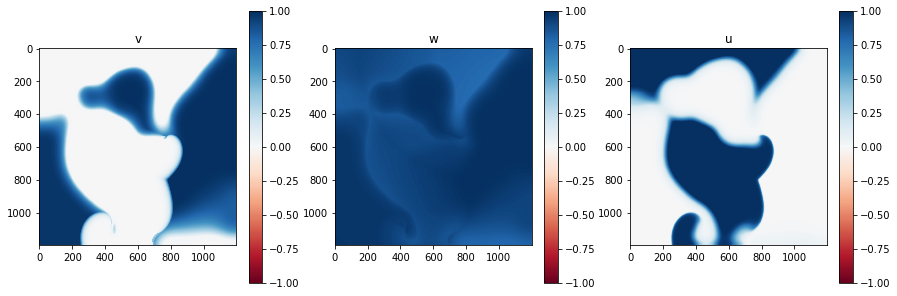

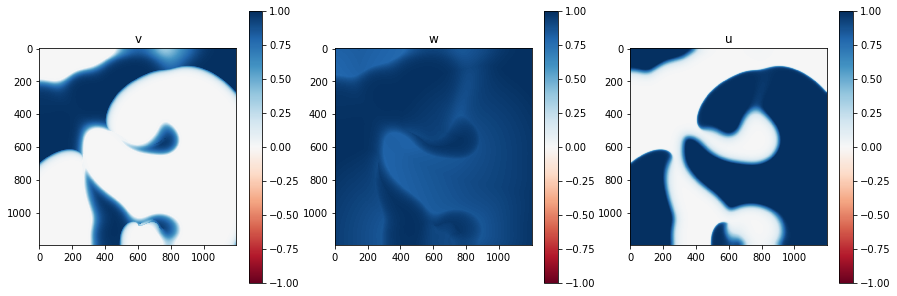

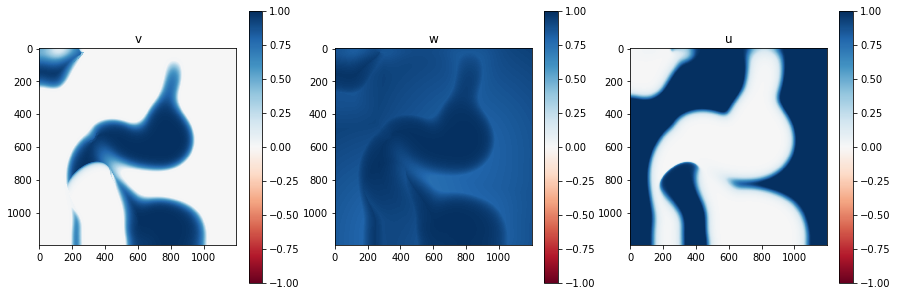

[DeviceArray([[1.1654567e+00, 1.1654561e+00, 1.1654536e+00, ...,
               0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
              [1.1654576e+00, 1.1654570e+00, 1.1654546e+00, ...,
               0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
              [1.1654464e+00, 1.1654460e+00, 1.1654435e+00, ...,
               0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
              ...,
              [1.1841993e+00, 1.1841985e+00, 1.1841992e+00, ...,
               3.6789826e-26, 4.8737848e-26, 4.3274194e-26],
              [1.1841987e+00, 1.1841971e+00, 1.1841993e+00, ...,
               3.6956112e-26, 4.8964344e-26, 4.3472510e-26],
              [1.1842003e+00, 1.1841986e+00, 1.1841997e+00, ...,
               3.6915264e-26, 4.8907922e-26, 4.3416085e-26]],            dtype=float32),
 DeviceArray([[1.1219478e+00, 1.1219466e+00, 1.1219548e+00, ...,
               3.4953114e-23, 3.5672745e-23, 3.7467078e-23],
              [1.1219471e+00, 1.1219457e+00, 1.1219542e+00, ...,
      

In [74]:
checkpoints = np.arange(0, 200000, 10000)
fk.model.forward(shape, checkpoints, cell_parameters, diffusivity, stimuli, dt, dx)

Tissue size (12, 12) Grid size (1200, 1200)
Checkpointing at: [     0    100    200 ... 199700 199800 199900]
Cell parameters {'tau_v_plus': 3.33, 'tau_v1_minus': 19.6, 'tau_v2_minus': 1250, 'tau_w_plus': 870, 'tau_w_minus': 41, 'tau_d': 0.25, 'tau_0': 12.5, 'tau_r': 33.33, 'tau_si': 29, 'k': 10, 'V_csi': 0.85, 'V_c': 0.13, 'V_v': 0.04, 'Cm': 1}


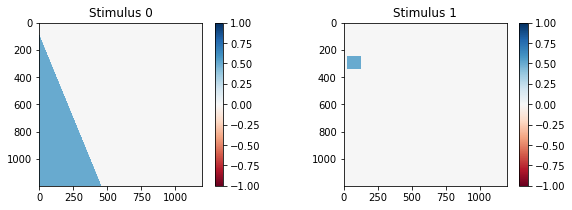

Solving at: 1999ms/1999ms		


In [75]:
fk.data.generate(start=fk.convert.ms_to_units(start, dt),
                 stop=fk.convert.ms_to_units(stop, dt),
                 dt=dt, dx=dx,
                 cell_parameters=cell_parameters,
                 diffusivity=diffusivity,
                 stimuli=stimuli,
                 filename=name)

(2000, 3, 1200, 1200)
(20, 3, 1200, 1200)


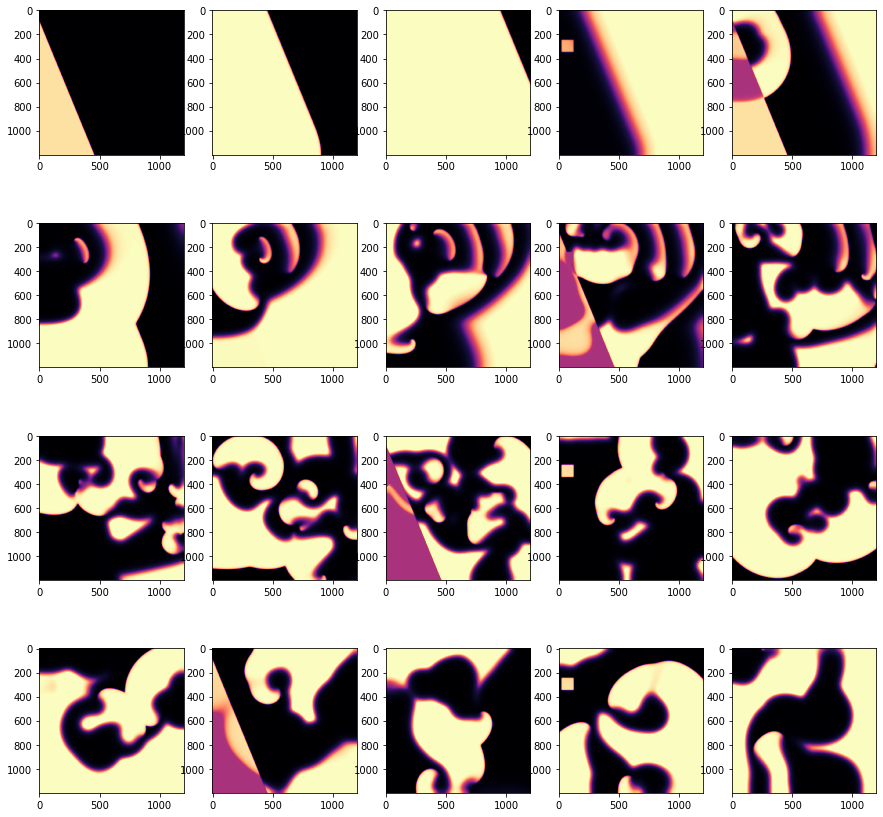

In [76]:
# display
show_every = 100  # ms
with h5py.File(name, "r") as file:
    states = file["states"][::show_every]
    print(file["states"].shape)
    print(states.shape)    

fig, ax = fk.plot.show_grid(states[:, 2], figsize=(15, 15))

(2000, 3, 1200, 1200)
(20, 3, 1200, 1200)


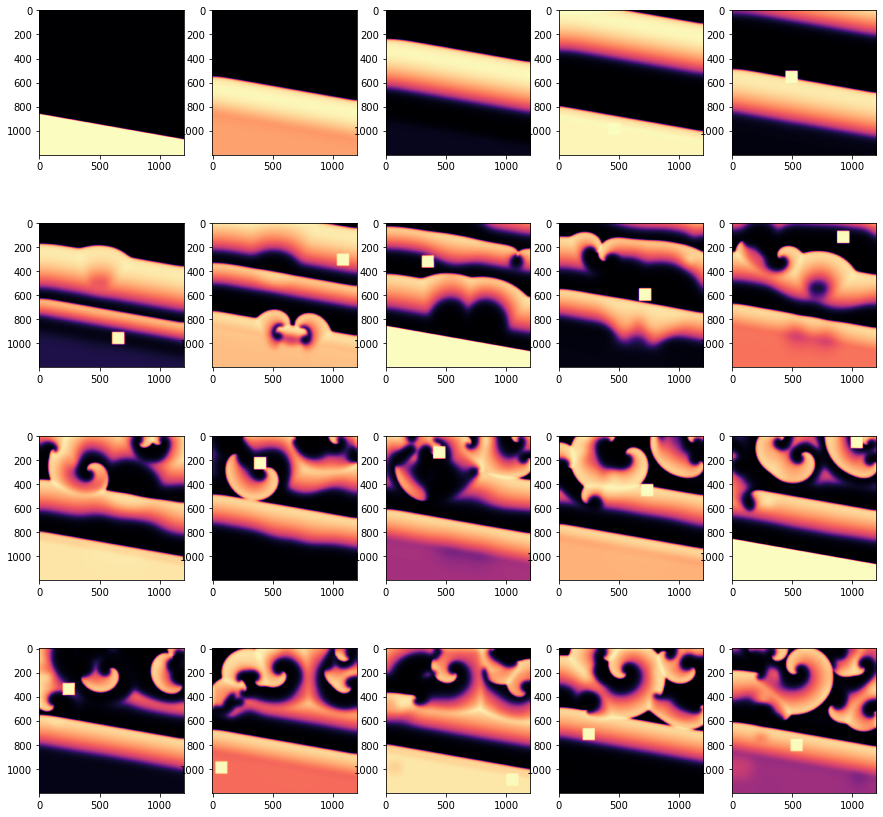

In [8]:
name = root + "train_dev_set/heartbeat_params9.hdf5"
# display
show_every = 100  # ms
with h5py.File(name, "r") as file:
    states = file["states"][::show_every]
    print(file["states"].shape)
    print(states.shape)    

fig, ax = fk.plot.show_grid(states[:, 2], figsize=(15, 15))